In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd .read_csv("C:\\Users\\kiran\\Downloads\\Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [21]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

In [24]:
data.isnull()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_income
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
595,False,False,False,False,False,False,False
596,False,False,False,False,False,False,False
597,False,False,False,False,False,False,False
598,False,False,False,False,False,False,False


<AxesSubplot:>

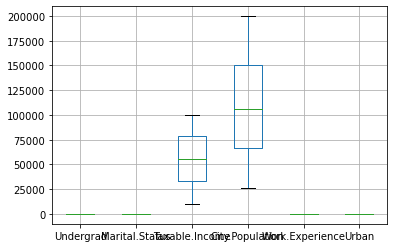

In [25]:
data.boxplot()

array([[<AxesSubplot:title={'center':'Undergrad'}>,
        <AxesSubplot:title={'center':'Marital.Status'}>],
       [<AxesSubplot:title={'center':'Taxable.Income'}>,
        <AxesSubplot:title={'center':'City.Population'}>],
       [<AxesSubplot:title={'center':'Work.Experience'}>,
        <AxesSubplot:title={'center':'Urban'}>]], dtype=object)

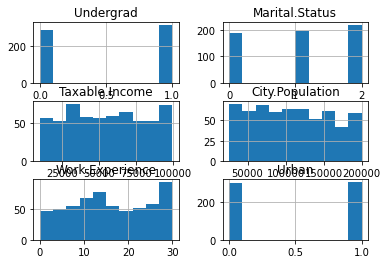

In [28]:
data.hist()

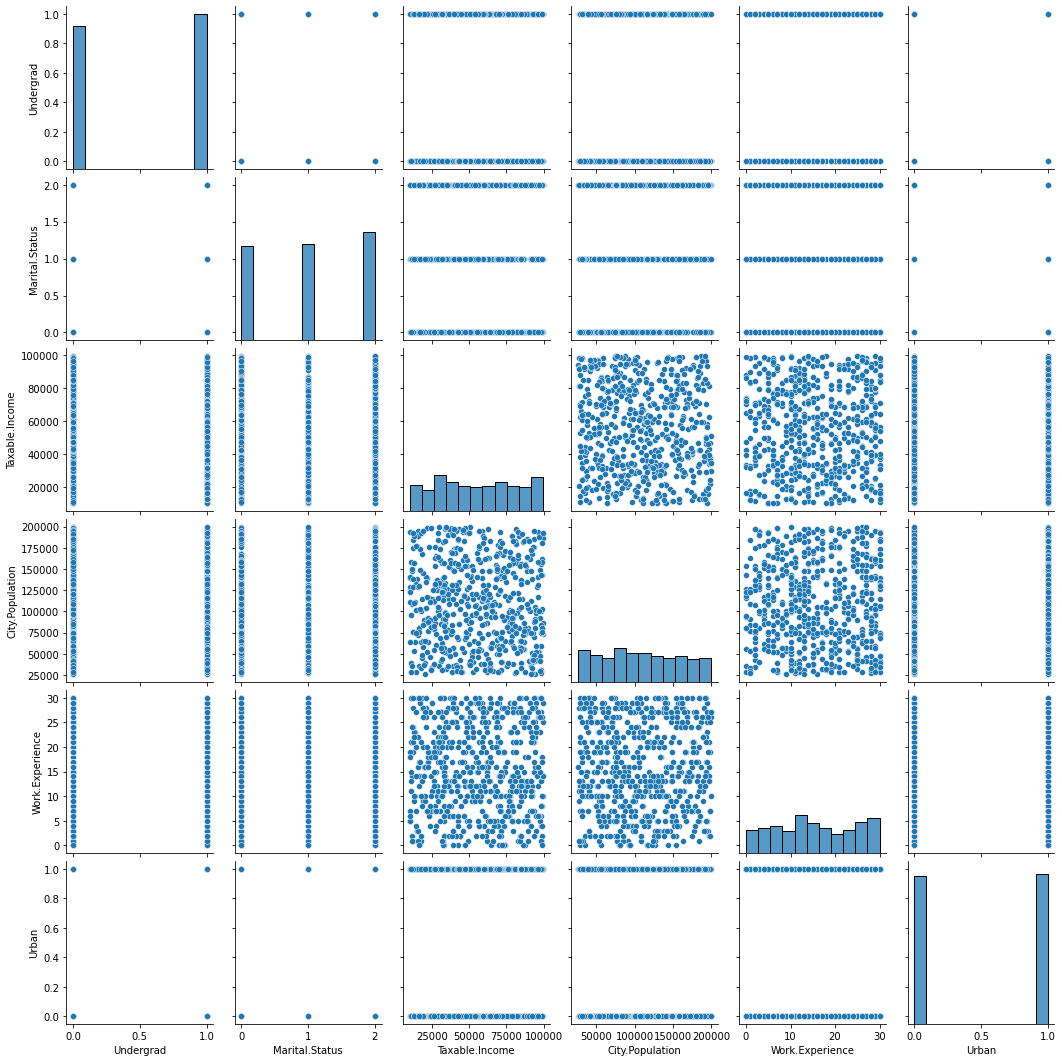

In [30]:
sns.pairplot(data)

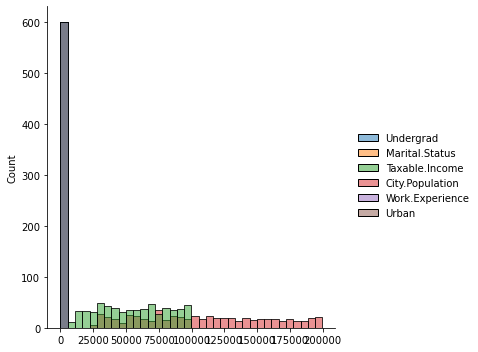

In [32]:
sns.displot(data)

In [34]:
data.kurt()

C:\Users\kiran\AppData\Local\Temp/ipykernel_46748/2907027414.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurt()


Undergrad         -2.000236
Marital.Status    -1.514965
Taxable.Income    -1.199782
City.Population   -1.120154
Work.Experience   -1.167524
Urban             -2.006521
dtype: float64

In [4]:
label_encoder = LabelEncoder()

data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status'] = label_encoder.fit_transform(data['Marital.Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])

In [5]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [6]:
data["Taxable.Income"].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [7]:
data['taxable_income'] = data['Taxable.Income'].map(lambda a:'risky' if a <= 30000 else 'good')

In [8]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_income
0,0,2,68833,50047,10,1,good
1,1,0,33700,134075,18,1,good
2,0,1,36925,160205,30,1,good
3,1,2,50190,193264,15,1,good
4,0,1,81002,27533,28,0,good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,good
596,1,0,69967,55369,2,1,good
597,0,0,47334,154058,0,1,good
598,1,1,98592,180083,17,0,good


In [9]:
data1 = data.drop(['Taxable.Income'],axis=1)

In [10]:
data1['taxable_income'] = label_encoder.fit_transform(data1['taxable_income'])

In [11]:
data1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,taxable_income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [12]:
X = data1.iloc[:,0:-1]
Y = data1.iloc[:,-1]

In [13]:
model = RandomForestClassifier()

In [14]:
model.fit(X,Y)

RandomForestClassifier()

In [15]:
pred = model.predict(X)

In [16]:
pd.Series(pred)

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Length: 600, dtype: int32

In [17]:
# checking the accuracy using KFold method :-

In [18]:
kfold = KFold(n_splits=10)



In [19]:
result = cross_val_score(model, X, Y, cv=kfold)


In [20]:
result.mean()

0.7383333333333333